In [163]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

# Bring in files and load into dataframe

In [164]:
states = input("Enter state: ")
states = states.lower()

Enter state: virginia


In [165]:
path = f"C:/Users/Fiona/Documents/School/UofA Boot Camp/Github Repositories/COVID-19.io/data/{states}_data/{states}_master_file.csv"
master_df = pd.read_csv(path)
master_df = master_df[master_df.County != 'Unassigned']

# Format dataframe

In [166]:
import datetime as dt
master_df['Date'] = master_df['Date'].apply(pd.to_datetime)
master_df['Date'] = master_df['Date'].dt.strftime('%m/%d')
master_df.sort_values(by=['County','Date'], inplace=True)
master_df = master_df.drop(columns=['FIPS', 'State','Country','lat','lon','Active','Combined_Key'])
master_df = master_df.drop(columns=['Recovered'])
# master_df = master_df.dropna()
# master_df

# Pivot dataframe for confirmed cases

In [167]:
try:
    master_df_confirmed = master_df.pivot(index=master_df.columns[0],
                  columns=master_df.columns[1],
                  values= master_df.columns[2])
except:
    master_df_confirmed = master_df.pivot_table(index='County', columns='Date', values='Confirmed')
dates_confirmed = list(master_df_confirmed.columns)
master_df_confirmed = master_df_confirmed.sort_values(by=dates_confirmed[-1], ascending=False)
# # master_df_confirmed = master_df_confirmed.dropna()
master_df_confirmed=master_df_confirmed[master_df_confirmed[dates_confirmed[-1]]!=0].dropna()
# master_df_confirmed=master_df_confirmed[master_df_confirmed[dates_confirmed[-1]]!=0].fillna(0, inplace=True)
master_df_confirmed.to_html(f'data/{states}_data/{states}_table.html')
master_df_confirmed

Date,03/22,03/23,03/24,03/25,03/26,03/27,03/28,03/29,03/30,03/31,...,07/31,08/01,08/02,08/03,08/04,08/05,08/06,08/07,08/08,08/09
County,,,,,,,,,,,,,,,,,,,,,
Fairfax,31.0,43.0,46.0,76.0,79.0,124.0,156.0,188.0,224.0,244.0,...,15606.0,15616.0,15689.0,15768.0,15907.0,15987.0,16019.0,16087.0,16241.0,16302.0
Prince William,18.0,18.0,23.0,32.0,36.0,44.0,56.0,72.0,79.0,94.0,...,8784.0,8838.0,8893.0,8907.0,8988.0,9089.0,9139.0,9163.0,9340.0,9428.0
Loudoun,15.0,15.0,18.0,20.0,28.0,43.0,54.0,61.0,61.0,87.0,...,4985.0,4995.0,5014.0,5034.0,5059.0,5093.0,5117.0,5150.0,5196.0,5254.0
Virginia Beach,17.0,17.0,17.0,23.0,26.0,29.0,35.0,49.0,52.0,65.0,...,3979.0,4055.0,4178.0,4299.0,4427.0,4529.0,4583.0,4658.0,4781.0,4895.0
Chesterfield,8.0,9.0,10.0,11.0,12.0,12.0,12.0,12.0,21.0,43.0,...,3877.0,3937.0,3968.0,4020.0,4097.0,4141.0,4170.0,4216.0,4283.0,4350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nelson,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,32.0,32.0,32.0,34.0,34.0,34.0,34.0,36.0,39.0,45.0
Poquoson,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,...,35.0,36.0,36.0,36.0,39.0,40.0,41.0,41.0,43.0,43.0
King and Queen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,35.0,35.0,35.0,35.0,36.0,37.0,37.0,37.0,39.0,39.0


In [168]:
counties = master_df_confirmed.reset_index()
master_df_confirmed1 = master_df_confirmed.astype('int64', copy=False)
master_df_confirmed1.loc['Total'] = master_df_confirmed1.sum()
master_df_confirmed1 = pd.DataFrame(master_df_confirmed1.loc["Total"])
master_df_confirmed1 = master_df_confirmed1.reset_index()
master_df_confirmed1 = master_df_confirmed1.transpose()
master_df_confirmed1.columns = master_df_confirmed1.iloc[0]
master_df_confirmed1 = master_df_confirmed1.drop(["Date"])
path1 = f"C:/Users/Fiona/Documents/School/UofA Boot Camp/Github Repositories/COVID-19.io/data/{states}_data/{states}_master_file_total.csv"
master_df_confirmed1.to_csv(path1,index=False)
path2 = f"C:/Users/Fiona/Documents/School/UofA Boot Camp/Github Repositories/COVID-19.io/data/{states}_data/{states}_master_file_county.csv"
counties.to_csv(path2,index=False)

# Matplotlib for confirmed cases

In [169]:
filter_list = master_df_confirmed[dates_confirmed[-1]]
li_1 = []
li_5000 = []
li_200 = []
li_50 = []
li_min = []
li_zero = []
count = 0
for i in filter_list:
    if i == 0:
        li_zero.append(master_df_confirmed.iloc[count])
    elif i <= 10:
        li_min.append(master_df_confirmed.iloc[count])
    elif i <= 50:
        li_50.append(master_df_confirmed.iloc[count])
    elif i <= 300:
        li_200.append(master_df_confirmed.iloc[count])
    elif i <= 5000:
        li_5000.append(master_df_confirmed.iloc[count])
    else:
        li_1.append(master_df_confirmed.iloc[count])
    count+=1
dates = len(dates_confirmed)
dates

140

In [170]:
if len(li_min) != 0:
    if len(li_min) > 75:
        plt.figure(figsize=(15,12))
        for i in li_min:
            plt.plot(i,label = i.name,)
        plt.legend(loc='upper left', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01),fontsize=13)
        plt.title(f"{states} counties under 10 cases on {dates_confirmed[-1]}",fontsize=30)
        plt.xlabel("Date",fontsize=30)
        plt.ylabel("Confirmed Cases",fontsize=30)
        plt.xticks(np.arange(1, dates, 2),rotation=65,fontsize=15)
#         np.arange(1, 21, 2) 
#         start,end or number of days, frequency of ticks
        plt.yticks(fontsize=15)
        plt.grid()
        plt.tight_layout()
        plt.savefig(f'data/{states}_data/{states}_confirmed_fig_1.png',dpi=200)
    else:
        plt.figure(figsize=(15,15))
        for i in li_min:
            plt.plot(i,label = i.name,)
        plt.legend(loc='upper left', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01),fontsize=13)
        plt.title(f"{states} counties under 10 cases on {dates_confirmed[-1]}",fontsize=30)
        plt.xlabel("Date",fontsize=30)
        plt.ylabel("Confirmed Cases",fontsize=30)
        plt.xticks(np.arange(1, dates, 5),rotation=65,fontsize=15)
#         np.arange(1, 21, 2)
        plt.yticks(fontsize=15)
        plt.grid()
        plt.tight_layout()
        plt.savefig(f'data/{states}_data/{states}_confirmed_fig_1.png',dpi=200)

In [171]:
if len(li_min) != 0:
    if len(li_min) > 65:
        li_min_df = pd.DataFrame(li_min)
        neww = li_min_df.plot.bar(figsize=(17,8),zorder=2,fontsize=10)
        neww.set_facecolor("lightgrey")
        plt.legend(loc='upper center', bbox_to_anchor=(1.17, 1.02), ncol=2, fancybox=True,fontsize=15)
        plt.ylabel("Confirmed Cases",fontsize=30)
        plt.xlabel("County",fontsize=30)
        plt.grid(zorder=0, color="black",linestyle="dotted")
        plt.title(f"{states} counties under 10 cases on {dates_confirmed[-1]}",fontsize=30)
        plt.tight_layout()
        plt.savefig(f'data/{states}_data/{states}_bar_confirmed1.png',dpi=200)
        plt.show()
    else:
        li_min_df = pd.DataFrame(li_min)
        neww = li_min_df.plot.bar(figsize=(13,8),zorder=2,fontsize = 15)
        neww.set_facecolor("lightgrey")
        plt.legend(loc='upper center', bbox_to_anchor=(1.17, 1.02), ncol=2, fancybox=True,fontsize=15)
        plt.ylabel("Confirmed Cases",fontsize=30)
        plt.xlabel("County",fontsize=30)
        plt.grid(zorder=0, color="black",linestyle="dotted")
        plt.title(f"{states} counties under 10 cases on {dates_confirmed[-1]}",fontsize=30)
        plt.tight_layout()
        plt.savefig(f'data/{states}_data/{states}_bar_confirmed1.png',dpi=200)
        plt.show()

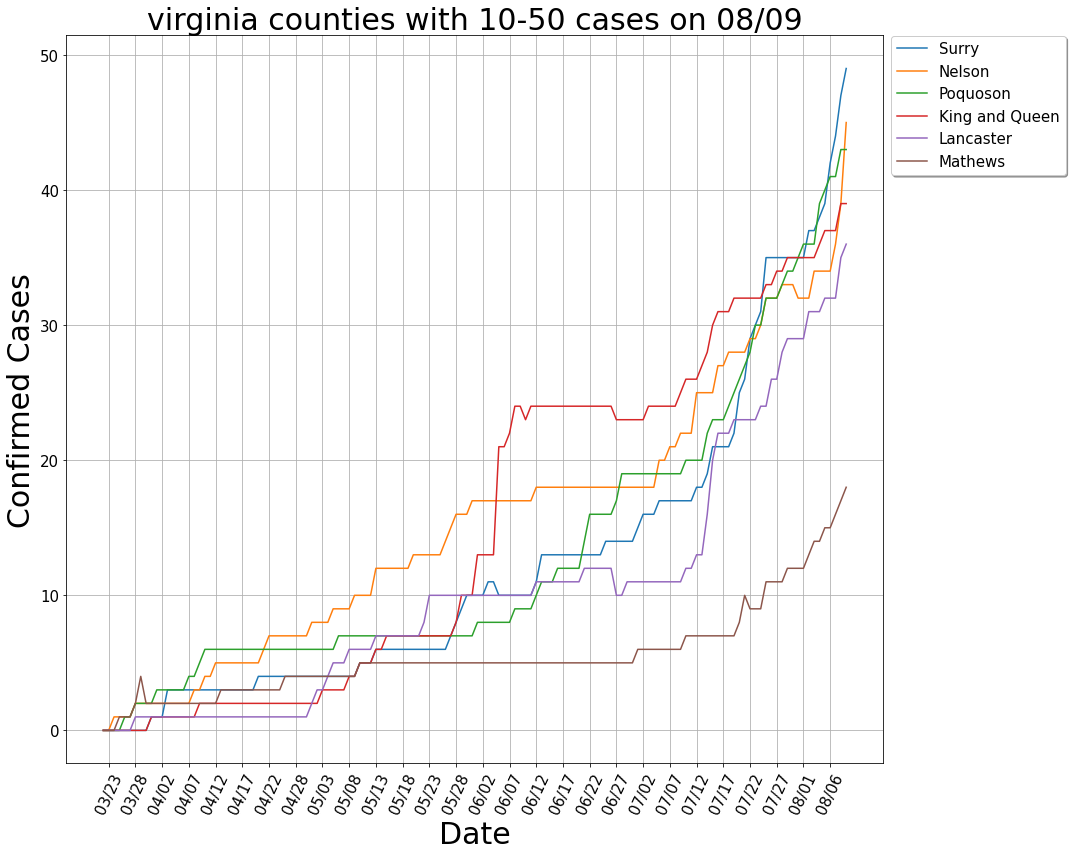

In [172]:
if len(li_50) != 0:
    plt.figure(figsize=(15,12))
    for i in li_50:
        plt.plot(i,label = i.name,)
    plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01),fontsize=15)
    plt.title(f"{states} counties with 10-50 cases on {dates_confirmed[-1]}",fontsize=30)
    plt.xlabel("Date",fontsize=30)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xticks(np.arange(1, dates, 5),rotation=65,fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_confirmed_fig_2.png',dpi=200)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # Remove the CWD from sys.path while we load stuff.


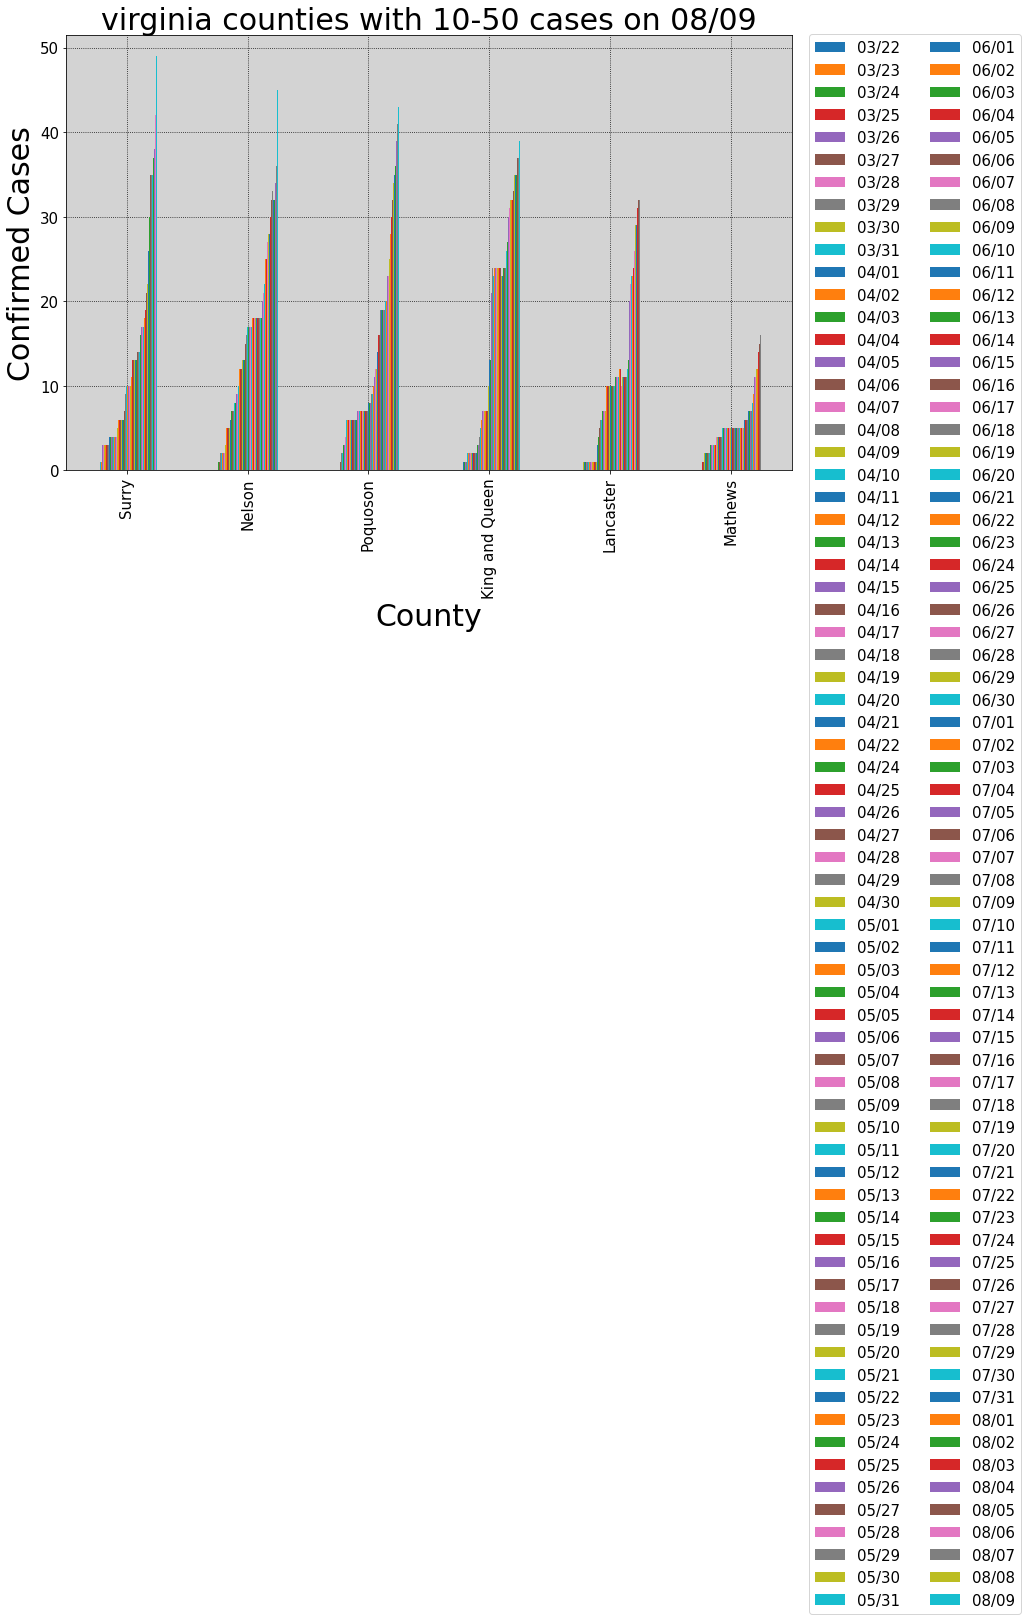

In [173]:
if len(li_50) != 0:
    li_50_df = pd.DataFrame(li_50)
    neww = li_50_df.plot.bar(figsize=(13,8),zorder=2,fontsize = 15)
    neww.set_facecolor("lightgrey")
    plt.legend(loc='upper center', bbox_to_anchor=(1.17, 1.02), ncol=2, fancybox=True,fontsize=15)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xlabel("County",fontsize=30)
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} counties with 10-50 cases on {dates_confirmed[-1]}",fontsize=30)
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed2.png',dpi=200)
    plt.show()

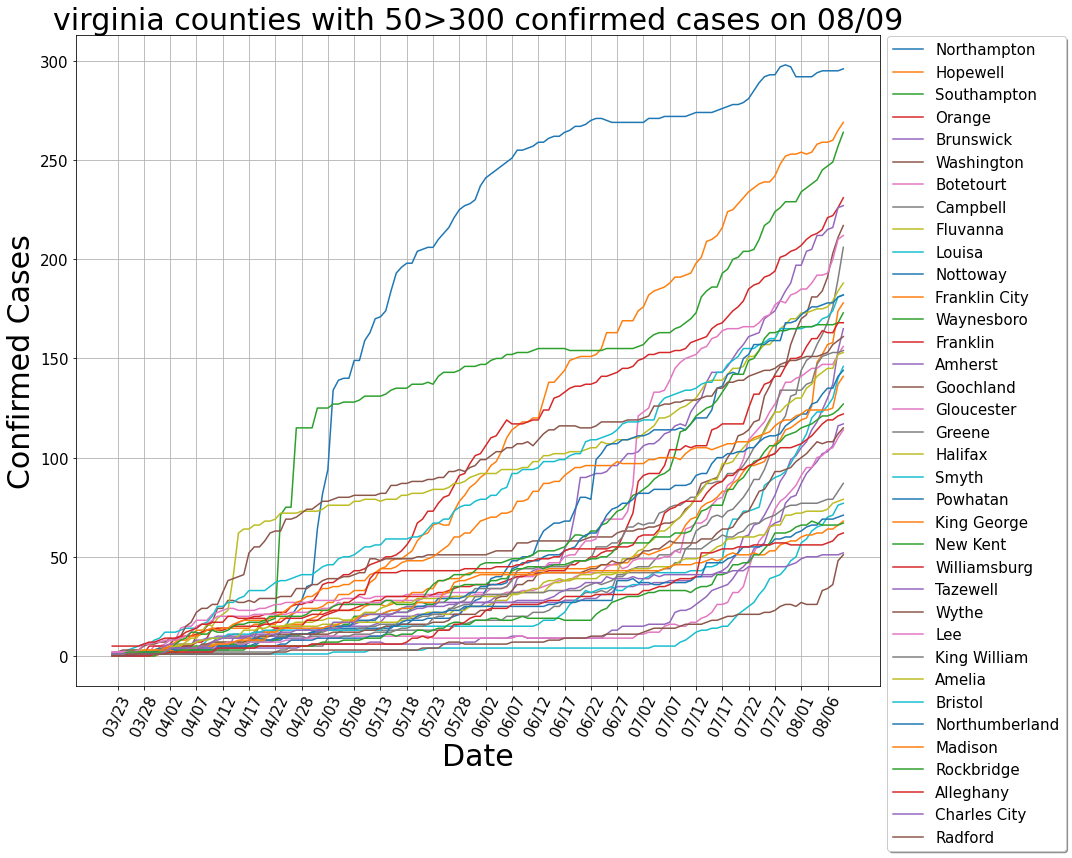

In [174]:
if len(li_200) != 0:
    plt.figure(figsize=(15,12))
    for i in li_200:
        plt.plot(i,label = i.name,)
    plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01),fontsize=15)
    plt.title(f"{states} counties with 50>300 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
    plt.xlabel("Date",fontsize=30)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xticks(np.arange(1, dates, 5),rotation=65,fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_confirmed_fig_3.png',dpi=200)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # Remove the CWD from sys.path while we load stuff.


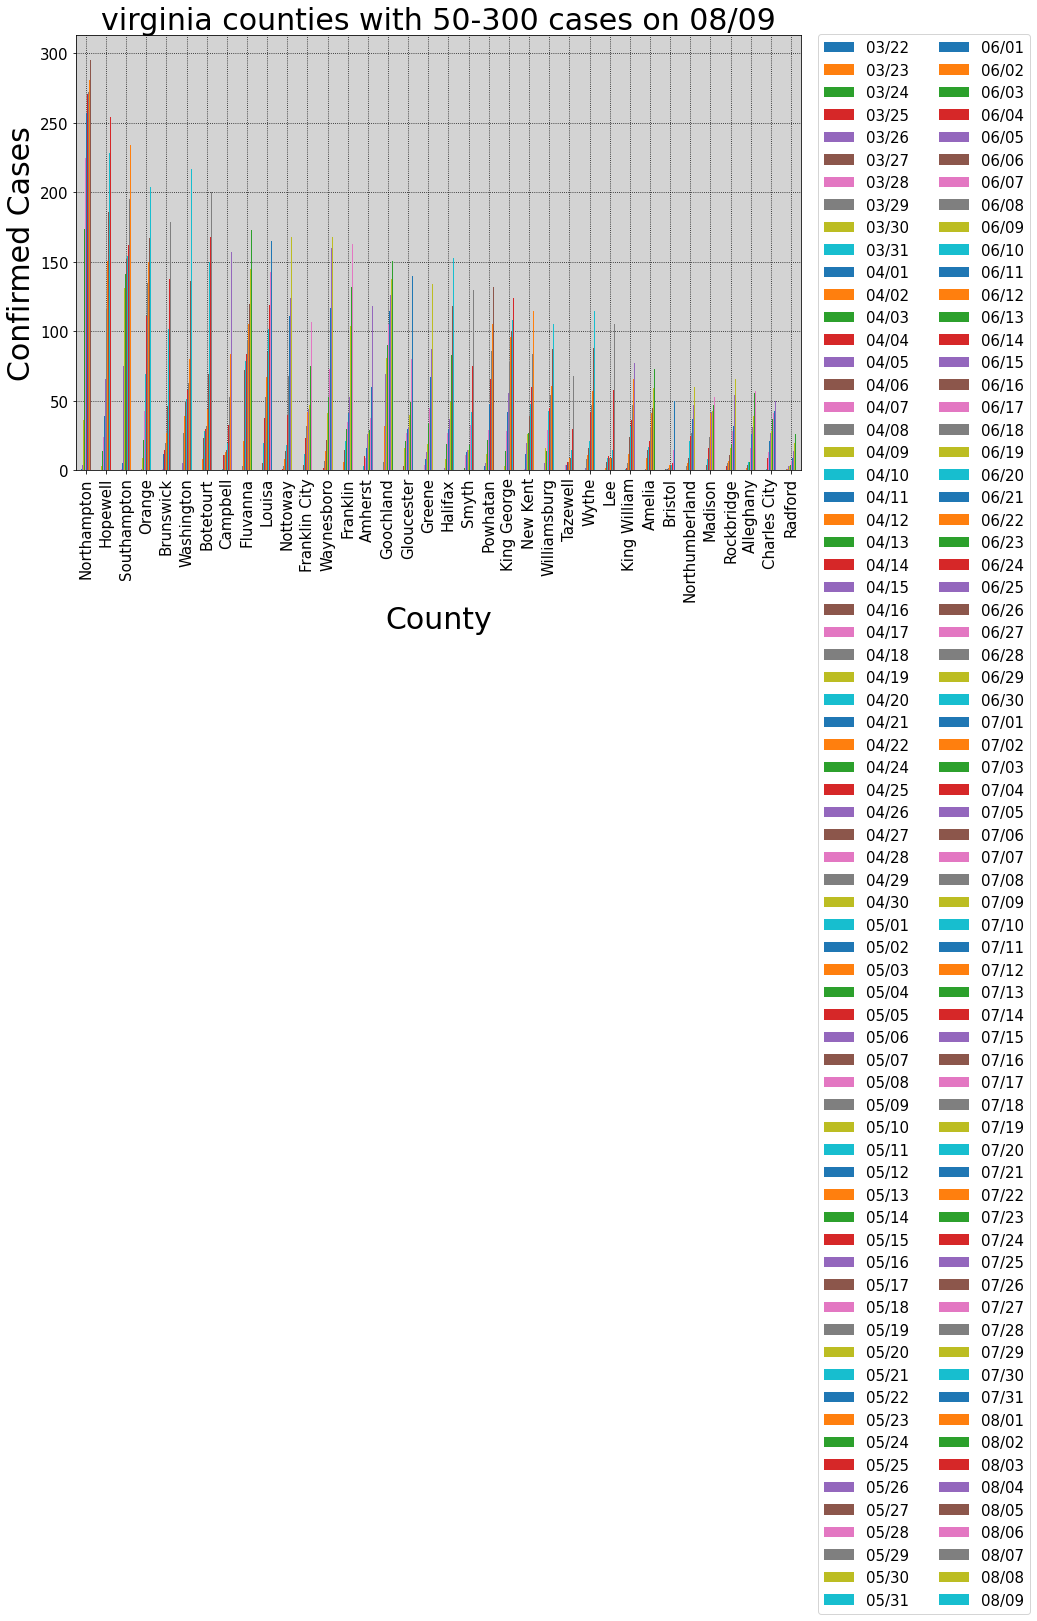

In [175]:
if len(li_200) != 0:
    li_200_df = pd.DataFrame(li_200)
    neww = li_200_df.plot.bar(figsize=(13,8),zorder=2,fontsize = 15)
    neww.set_facecolor("lightgrey")
    plt.legend(loc='upper center', bbox_to_anchor=(1.17, 1.02), ncol=2, fancybox=True,fontsize=15)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xlabel("County",fontsize=30)
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} counties with 50-300 cases on {dates_confirmed[-1]}",fontsize=30)
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed3.png',dpi=200)
    plt.show()

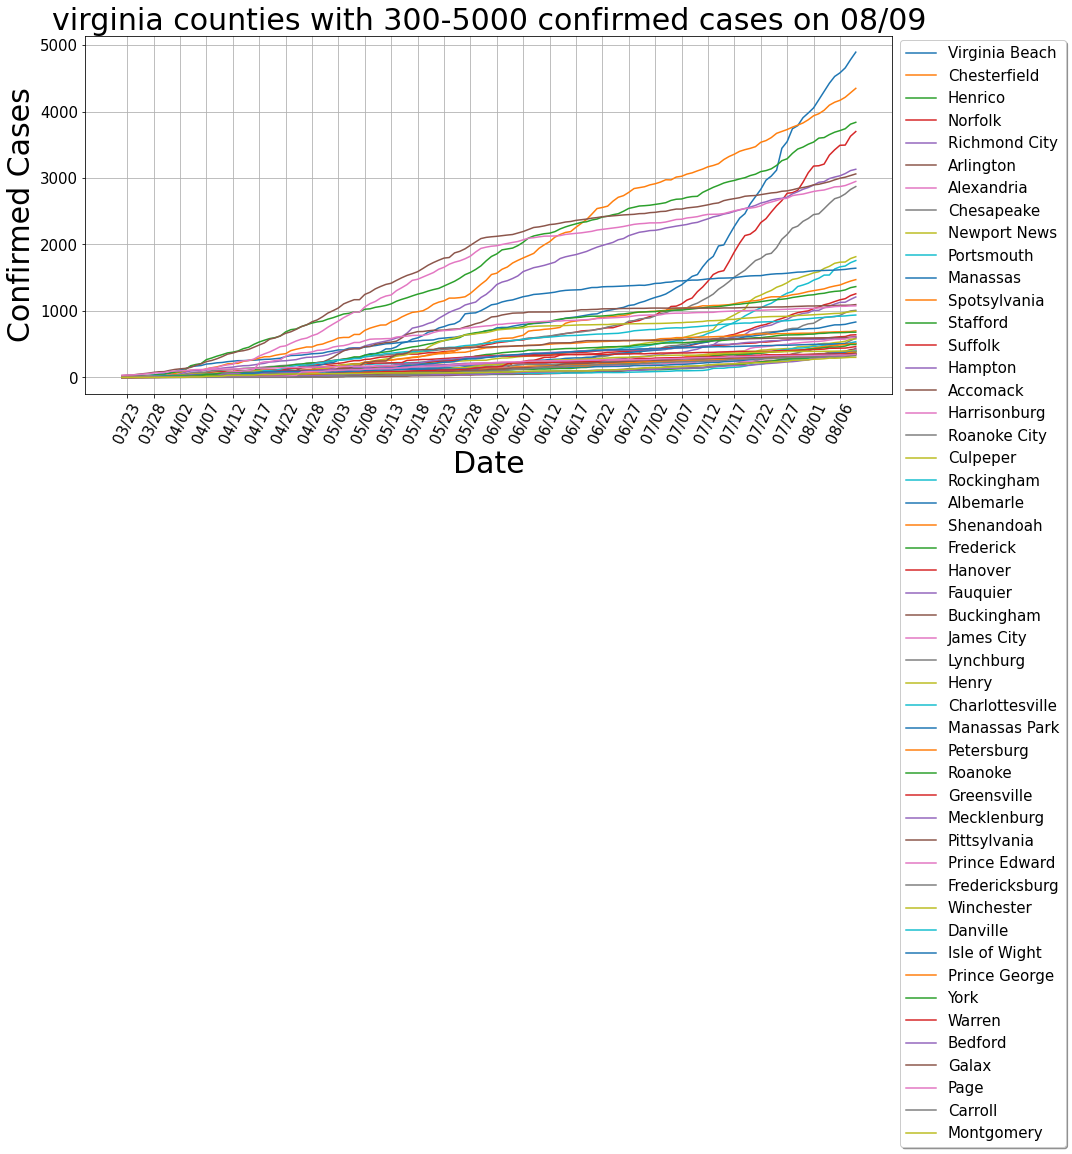

In [176]:
if len(li_5000) != 0:
    plt.figure(figsize=(15,12))
    for i in li_5000:
        plt.plot(i,label = i.name,)
    plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01),fontsize=15)
    plt.title(f"{states} counties with 300-5000 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
    plt.xlabel("Date",fontsize=30)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xticks(np.arange(1, dates, 5),rotation=65,fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_confirmed_fig_4.png',dpi=200)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


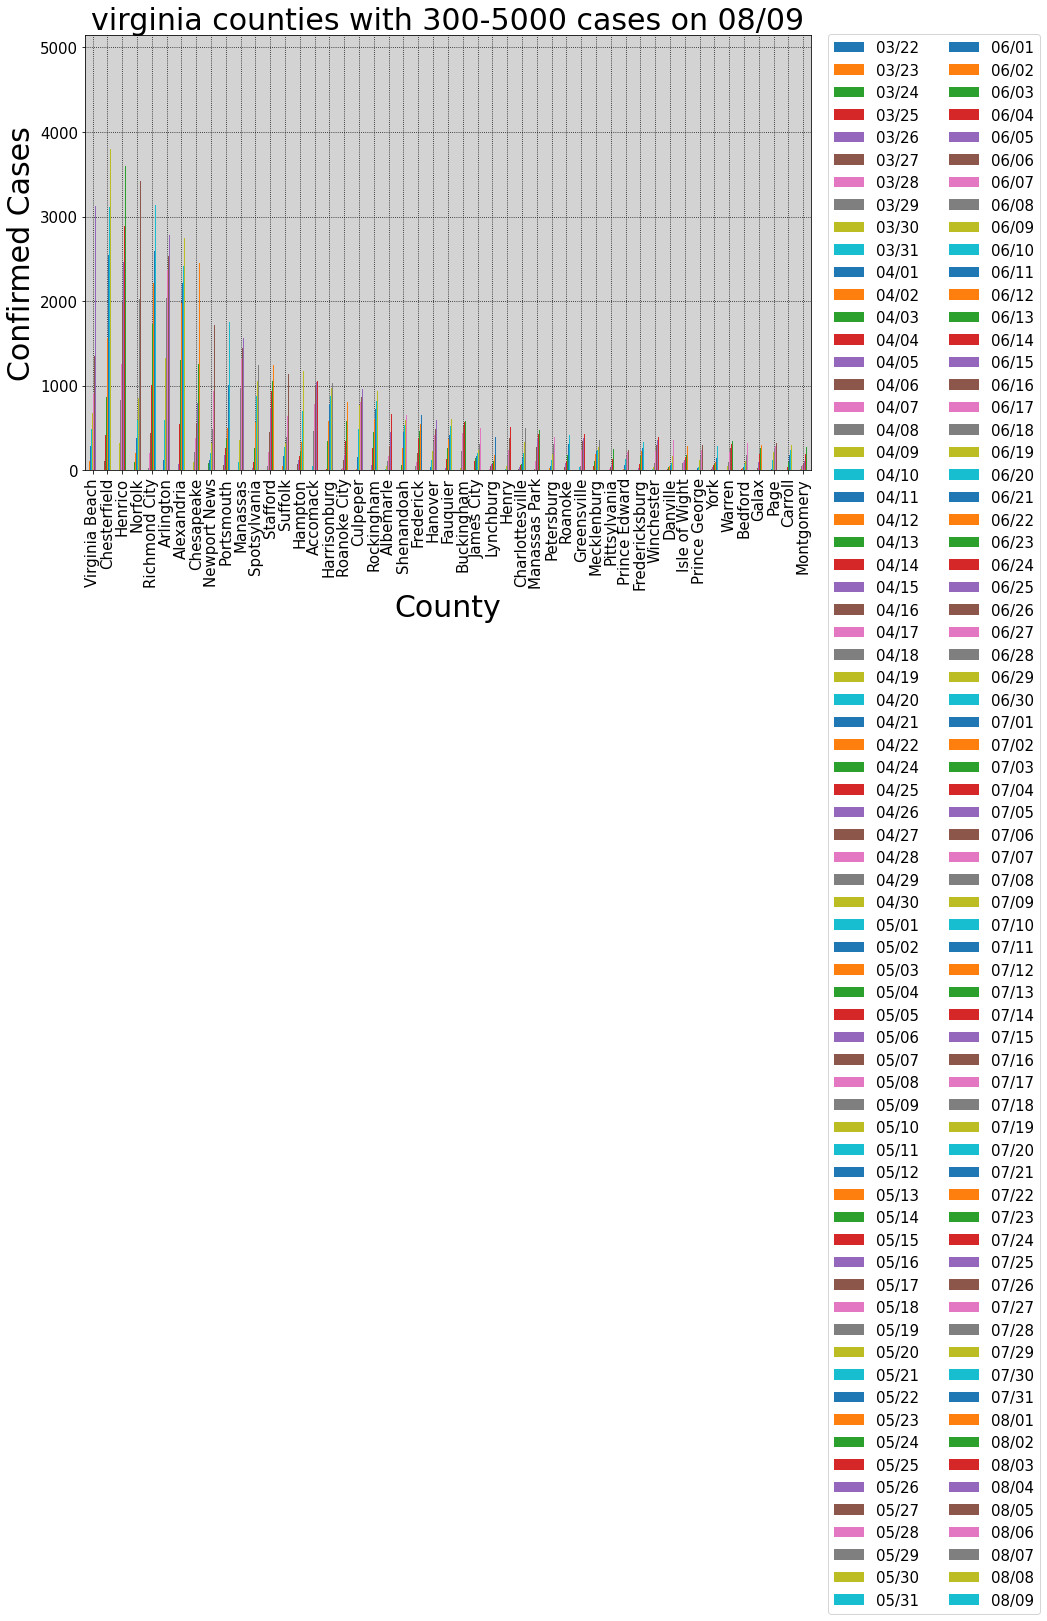

In [177]:
if len(li_5000) != 0:
    li_5000_df = pd.DataFrame(li_5000)
    neww = li_5000_df.plot.bar(figsize=(13,8),zorder=2,fontsize = 15)   
#     last_num=0
#     if len(li_5000) < 2:
#         for i in neww.patches:
#             if last_num != 0:
#                 inc_amt = i.get_height()-last_num
#                 neww.text(i.get_x(), i.get_height(), \
#                     str(f'+{inc_amt}'), fontsize=12,color='black')
#             last_num = int(i.get_height())
    neww.set_facecolor("lightgrey")
    plt.legend(loc='upper center', bbox_to_anchor=(1.17, 1.02), ncol=2, fancybox=True,fontsize=15)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xlabel("County",fontsize=30)
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} counties with 300-5000 cases on {dates_confirmed[-1]}",fontsize=30)
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed4.png',dpi=200)
    plt.show()

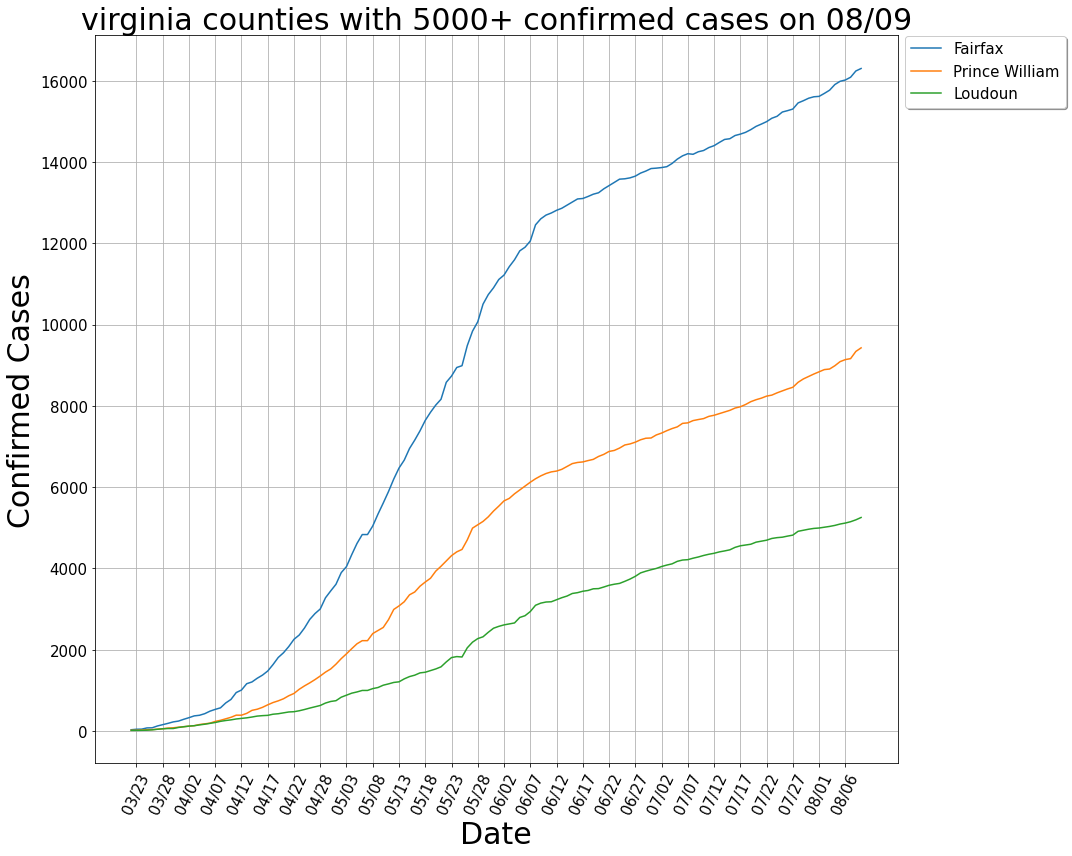

In [178]:
if len(li_1) != 0:
    plt.figure(figsize=(15,12))
    for i in li_1:
        plt.plot(i,label = i.name,)
    plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01),fontsize=15)
    plt.title(f"{states} counties with 5000+ confirmed cases on {dates_confirmed[-1]}",fontsize=30)
    plt.xlabel("Date",fontsize=30)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xticks(np.arange(1, dates, 5),rotation=65,fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_confirmed_fig_5.png',dpi=200)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  app.launch_new_instance()


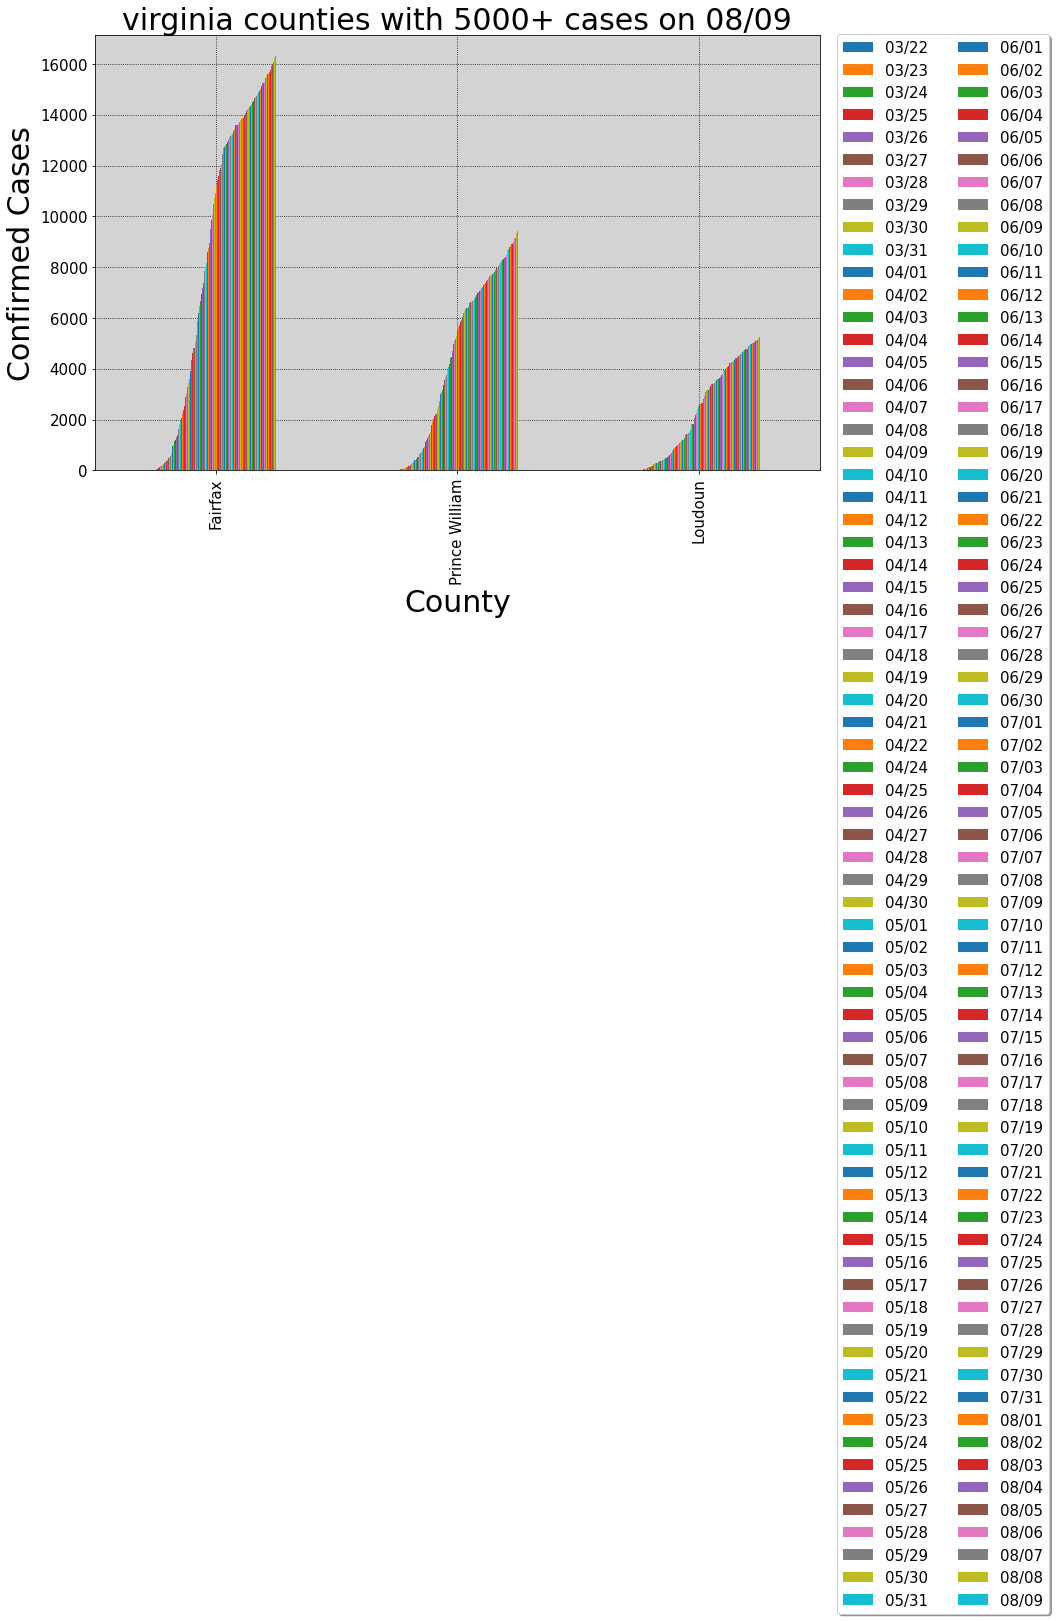

In [179]:
if len(li_1) != 0:
    li_1_df = pd.DataFrame(li_1)
    neww = li_1_df.plot.bar(figsize=(13,8),zorder=2,fontsize = 15)
#     for i in neww.patches:
#         if last_num != 0:
#             inc_amt = i.get_height()-last_num
#             neww.text(i.get_x(), i.get_height(), \
#                 str(f'+{inc_amt}'), fontsize=12,color='black')
#         last_num = int(i.get_height())
    neww.set_facecolor("lightgrey")
    plt.legend(loc='upper center', bbox_to_anchor=(1.17, 1.02), ncol=2, fancybox=True, shadow=True,fontsize=15)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xlabel("County",fontsize=30)
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} counties with 5000+ cases on {dates_confirmed[-1]}",fontsize=30)
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed5.png',dpi=200)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  if __name__ == '__main__':


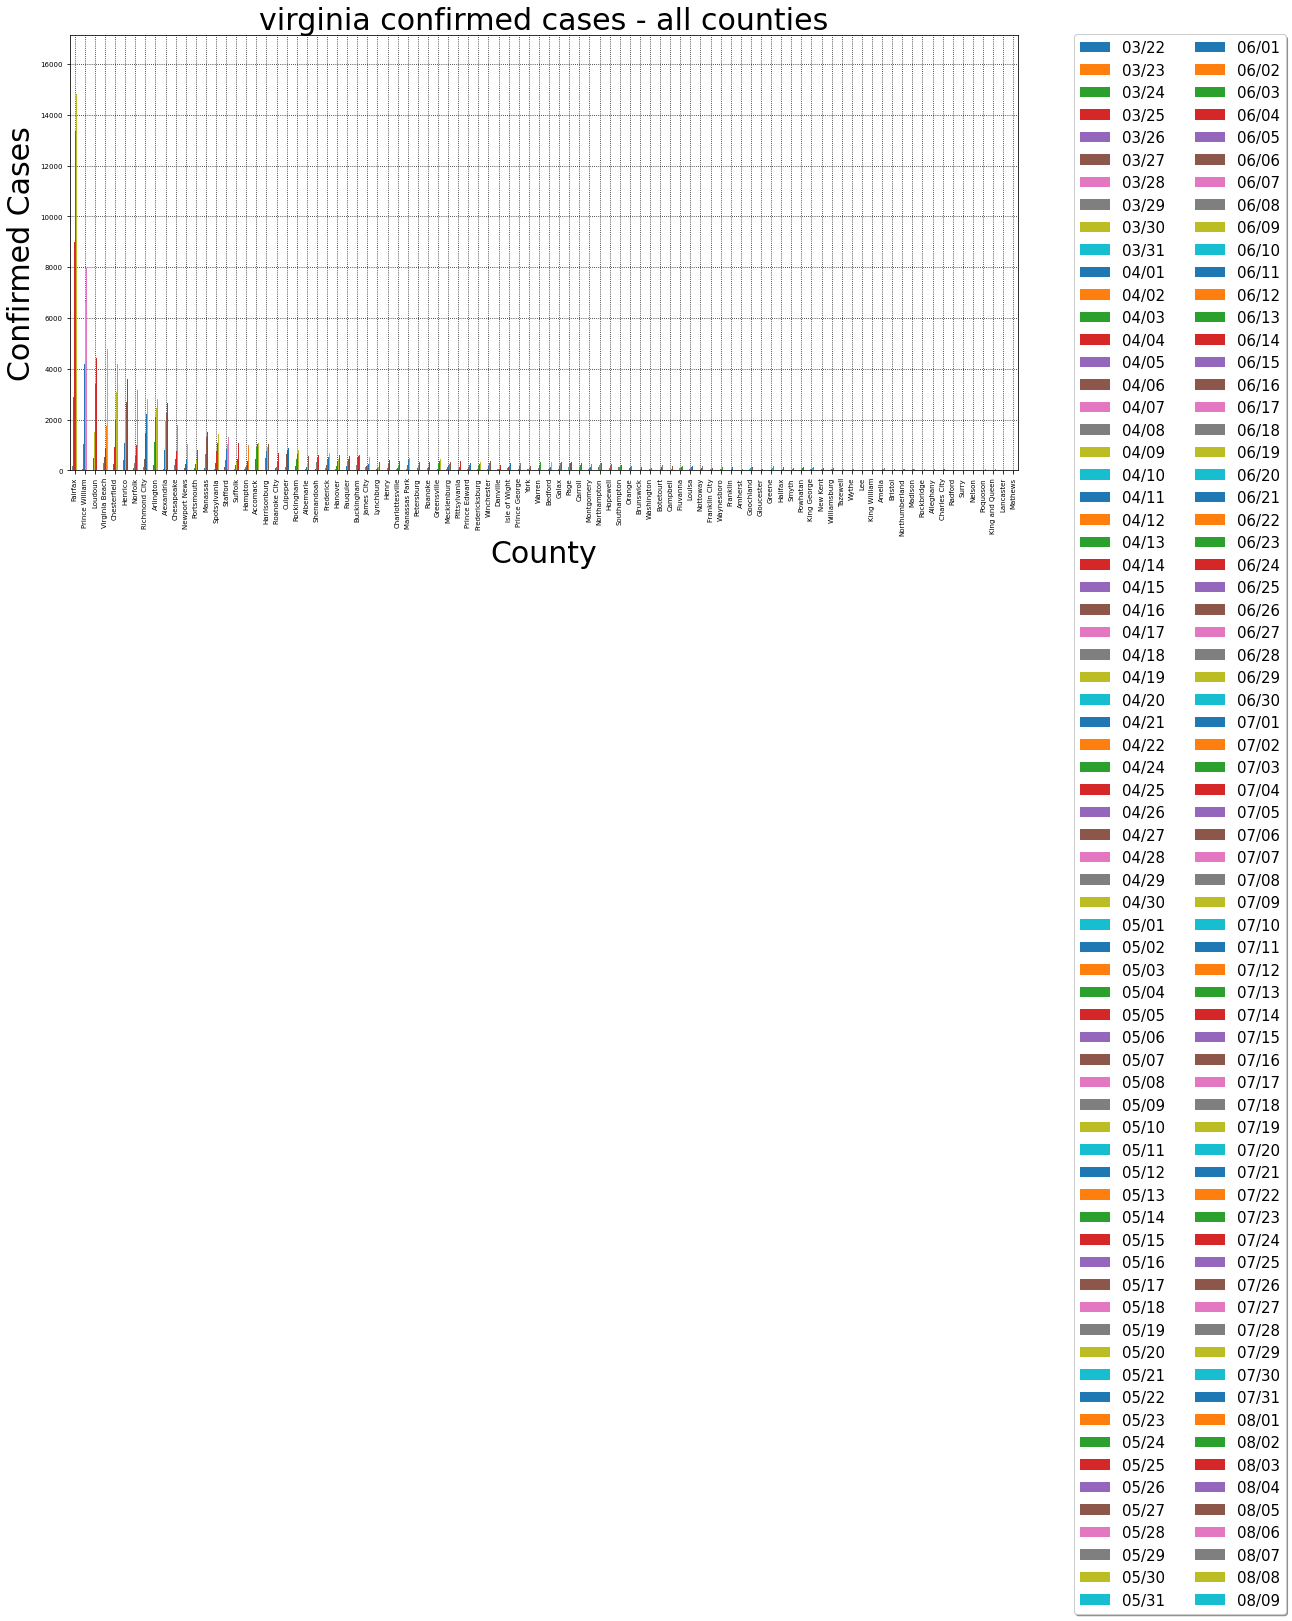

In [180]:
if count > 65:
    neww = master_df_confirmed.plot.bar(figsize=(17,8),zorder=2,fontsize = 7)
    plt.legend(loc='upper center', bbox_to_anchor=(1.17, 1.02), ncol=2, fancybox=True, shadow=True,fontsize=15)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xlabel("County",fontsize=30)
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} confirmed cases - all counties",fontsize=30)
    # plt.xticks(rotation=65)
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed.png',dpi=200)
    plt.show()
else:
    neww = master_df_confirmed.plot.bar(figsize=(13,8),zorder=2,fontsize = 14)
    plt.legend(loc='upper center', bbox_to_anchor=(1.17, 1.02), ncol=2, fancybox=True, shadow=True,fontsize=15)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xlabel("County",fontsize=30)
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} confirmed cases - all counties",fontsize=30)
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed.png',dpi=200)
    plt.show()